In [29]:
import numpy as np
import pandas as pd
import os
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt


In [30]:
dataframe = pd.read_csv('BTC-USD.csv')

In [31]:
print(dataframe.shape)

(1985, 7)


In [32]:
dataframe = dataframe.filter(['Date','Close'])

In [33]:
prediction_days = 22

In [34]:
dataframe['Prediction'] = dataframe['Close'].shift(-prediction_days)

In [35]:
dataframe.tail(30)

,Date,Close,Prediction
1955,2020-01-24,8445.434570,9889.424805
1956,2020-01-25,8367.847656,9934.433594
1957,2020-01-26,8596.830078,9690.142578
1958,2020-01-27,8909.819336,10141.996094
1959,2020-01-28,9358.589844,9633.386719
1960,2020-01-29,9316.629883,9608.475586
1961,2020-01-30,9508.993164,9686.441406
1962,2020-01-31,9350.529297,9646.580078
1963,2020-02-01,9392.875000,NaN
1964,2020-02-02,9344.365234,NaN


In [38]:
x = dataframe['Close']
x = x[:-prediction_days]
x = np.array(x)
x = np.reshape(x,(len(x),1))
x.shape

(1963, 1)

In [43]:
y = dataframe['Prediction']
y = y[:-prediction_days]
y.shape

(1963,)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [45]:
x_prediction = dataframe['Close']
x_prediction = x_prediction[-prediction_days:]
x_prediction = np.array(x_prediction)
x_prediction = np.reshape(x_prediction,(len(x_prediction),1))
x_prediction.shape

(22, 1)

In [46]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr.fit(x_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
confidence = svr.score(x_test, y_test)
print("confidence: ", confidence)

confidence:  0.8625559501062716


In [49]:
prediction = svr.predict(x_prediction)

In [50]:
date = dataframe['Date']
date = date[-prediction_days:]

In [52]:
for (d,original,predicted) in zip(date,x_prediction,prediction):
    print('Date:',d,' Original Price:',original[0],' Predicted Price:',predicted)

Date: 2020-02-01  Original Price: 9392.875  Predicted Price: 8759.917652005135
Date: 2020-02-02  Original Price: 9344.365234  Predicted Price: 8403.149559080128
Date: 2020-02-03  Original Price: 9293.521484  Predicted Price: 8054.064976335765
Date: 2020-02-04  Original Price: 9180.962891  Predicted Price: 7589.673311549603
Date: 2020-02-05  Original Price: 9613.423828  Predicted Price: 9703.764458382577
Date: 2020-02-06  Original Price: 9729.801758  Predicted Price: 9716.442693257048
Date: 2020-02-07  Original Price: 9795.943359  Predicted Price: 9771.613336836925
Date: 2020-02-08  Original Price: 9865.119141  Predicted Price: 9933.721715474745
Date: 2020-02-09  Original Price: 10116.673828  Predicted Price: 10432.021981138969
Date: 2020-02-10  Original Price: 9856.611328  Predicted Price: 9908.32935778371
Date: 2020-02-11  Original Price: 10208.236328  Predicted Price: 10076.068083160704
Date: 2020-02-12  Original Price: 10326.054688  Predicted Price: 9388.746636761542
Date: 2020-02-1

In [53]:
x_prediction = np.reshape(x_prediction,(len(x_prediction)))

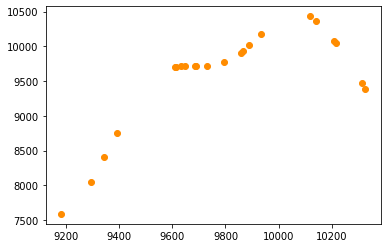

In [54]:
plt.scatter(x_prediction, prediction, color='darkorange', label='data')